<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_attack_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../dataset/attack.csv')
df.head(3)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,K. Mbappé,23,2024,91,95,190500000.0,230000.0,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,84,88,26,34,32,13.0,5.0,7.0,11.0,6.0
1,E. Haaland,21,2027,90,94,176500000.0,240000.0,47,95,80,75,89,78,77,62,53,82,82,94,76,93,74,94,78,79,93,86,87,42,95,74,84,87,41,53,29,7.0,14.0,13.0,11.0,7.0
2,Vinícius Jr.,21,2025,86,92,109000000.0,200000.0,72,84,50,75,72,92,77,62,73,89,95,95,94,82,83,76,75,84,64,76,58,26,82,75,65,79,32,25,18,5.0,7.0,7.0,7.0,10.0


In [5]:
df.drop(['name', 'age', 'Overall rating', 'Potential', 'Wage', 'Interceptions', 'Defensive awareness', 'Standing tackle', 'Sliding tackle', 'Contract valid until', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [6]:
# số cell bị null
df.isnull().sum()

Value               0
Crossing            0
Finishing           0
Heading accuracy    0
Short passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long passing        0
Ball control        0
Acceleration        0
Sprint speed        0
Agility             0
Reactions           0
Balance             0
Shot power          0
Jumping             0
Stamina             0
Strength            0
Long shots          0
Aggression          0
Positioning         0
Vision              0
Penalties           0
Composure           0
dtype: int64

In [7]:
# số hàng bị lặp
df.duplicated().sum()

0

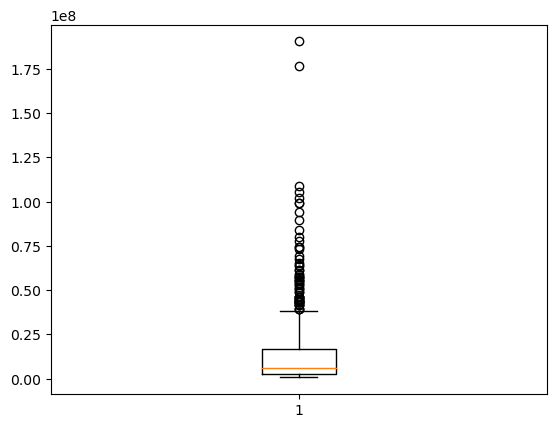

In [8]:
# chuẩn hóa dữ liệu
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  # đưa chỉ số về khoảng 0->1
  df[column] = df[column]/100

  # nên cho xuống dưới sau khi thể hiện correlation thì *2 các cột có correlation cao
  # ==== đối với tiền tạo thì chỉ số dứt điểm quan trọng hơn nên *2 để mô hình dự đoán nhạy cảm hơn với chỉ số nàys ===============
  #if column == 'Finishing': df[column] = df[column]*2

plt.boxplot(x=df['Value'])
plt.show()

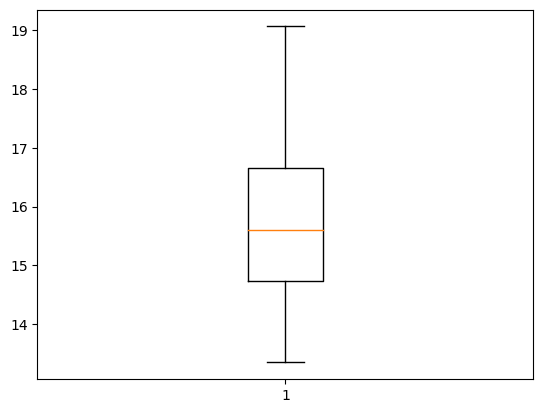

In [9]:
# đưa giá trị cầu thủ về thang đơn vị log
df['Value'] = np.log(df['Value'])
plt.boxplot(x=df['Value'])
plt.show()

In [10]:
df.describe()

,Value,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Positioning,Vision,Penalties,Composure
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,15.693141,0.624458,0.726250,0.629417,0.706014,0.660514,0.751153,0.650597,0.570569,0.599347,0.750750,0.754208,0.755000,0.740639,0.712778,0.709056,0.739972,0.664083,0.686806,0.672139,0.682972,0.584139,0.732917,0.676458,0.665889,0.702000
std,1.228794,0.126839,0.076251,0.138273,0.079586,0.105937,0.075767,0.122990,0.129730,0.114565,0.071929,0.102120,0.094936,0.107523,0.089211,0.121119,0.077220,0.130824,0.103780,0.131531,0.089438,0.144735,0.082416,0.101033,0.094459,0.091532
min,13.345507,0.260000,0.350000,0.220000,0.470000,0.210000,0.510000,0.310000,0.290000,0.300000,0.540000,0.340000,0.330000,0.330000,0.430000,0.310000,0.380000,0.300000,0.320000,0.290000,0.290000,0.250000,0.480000,0.390000,0.350000,0.450000
25%,14.731801,0.540000,0.680000,0.540000,0.650000,0.580000,0.700000,0.560000,0.470000,0.510000,0.700000,0.690000,0.690000,0.677500,0.660000,0.650000,0.690000,0.580000,0.630000,0.590000,0.630000,0.470000,0.680000,0.610000,0.600000,0.650000
50%,15.607270,0.650000,0.730000,0.650000,0.720000,0.680000,0.760000,0.660000,0.560000,0.610000,0.760000,0.760000,0.760000,0.755000,0.730000,0.720000,0.750000,0.670000,0.690000,0.680000,0.690000,0.590000,0.740000,0.690000,0.660000,0.710000
75%,16.648724,0.720000,0.772500,0.740000,0.760000,0.740000,0.810000,0.750000,0.670000,0.680000,0.800000,0.830000,0.820000,0.820000,0.770000,0.790000,0.800000,0.760000,0.760000,0.760000,0.750000,0.690000,0.790000,0.750000,0.720000,0.770000
max,19.065163,0.900000,0.950000,0.910000,0.910000,0.900000,0.950000,0.930000,0.930000,0.900000,0.940000,0.970000,0.970000,0.940000,0.930000,0.950000,0.940000,0.920000,0.910000,0.950000,0.910000,0.910000,0.950000,0.940000,0.920000,0.960000


###Utility function

In [11]:
# thể hiện quan hệ giữa giá trị chuyển nhượng với các thuộc tính khác
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [12]:
# vẽ biểu đồ hộp
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [13]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    # gán giá trị bất thường = lower fence hoặc higher fence
    for i in IndexL_Outlier:
      data[column][i] = Lower_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = Higher_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

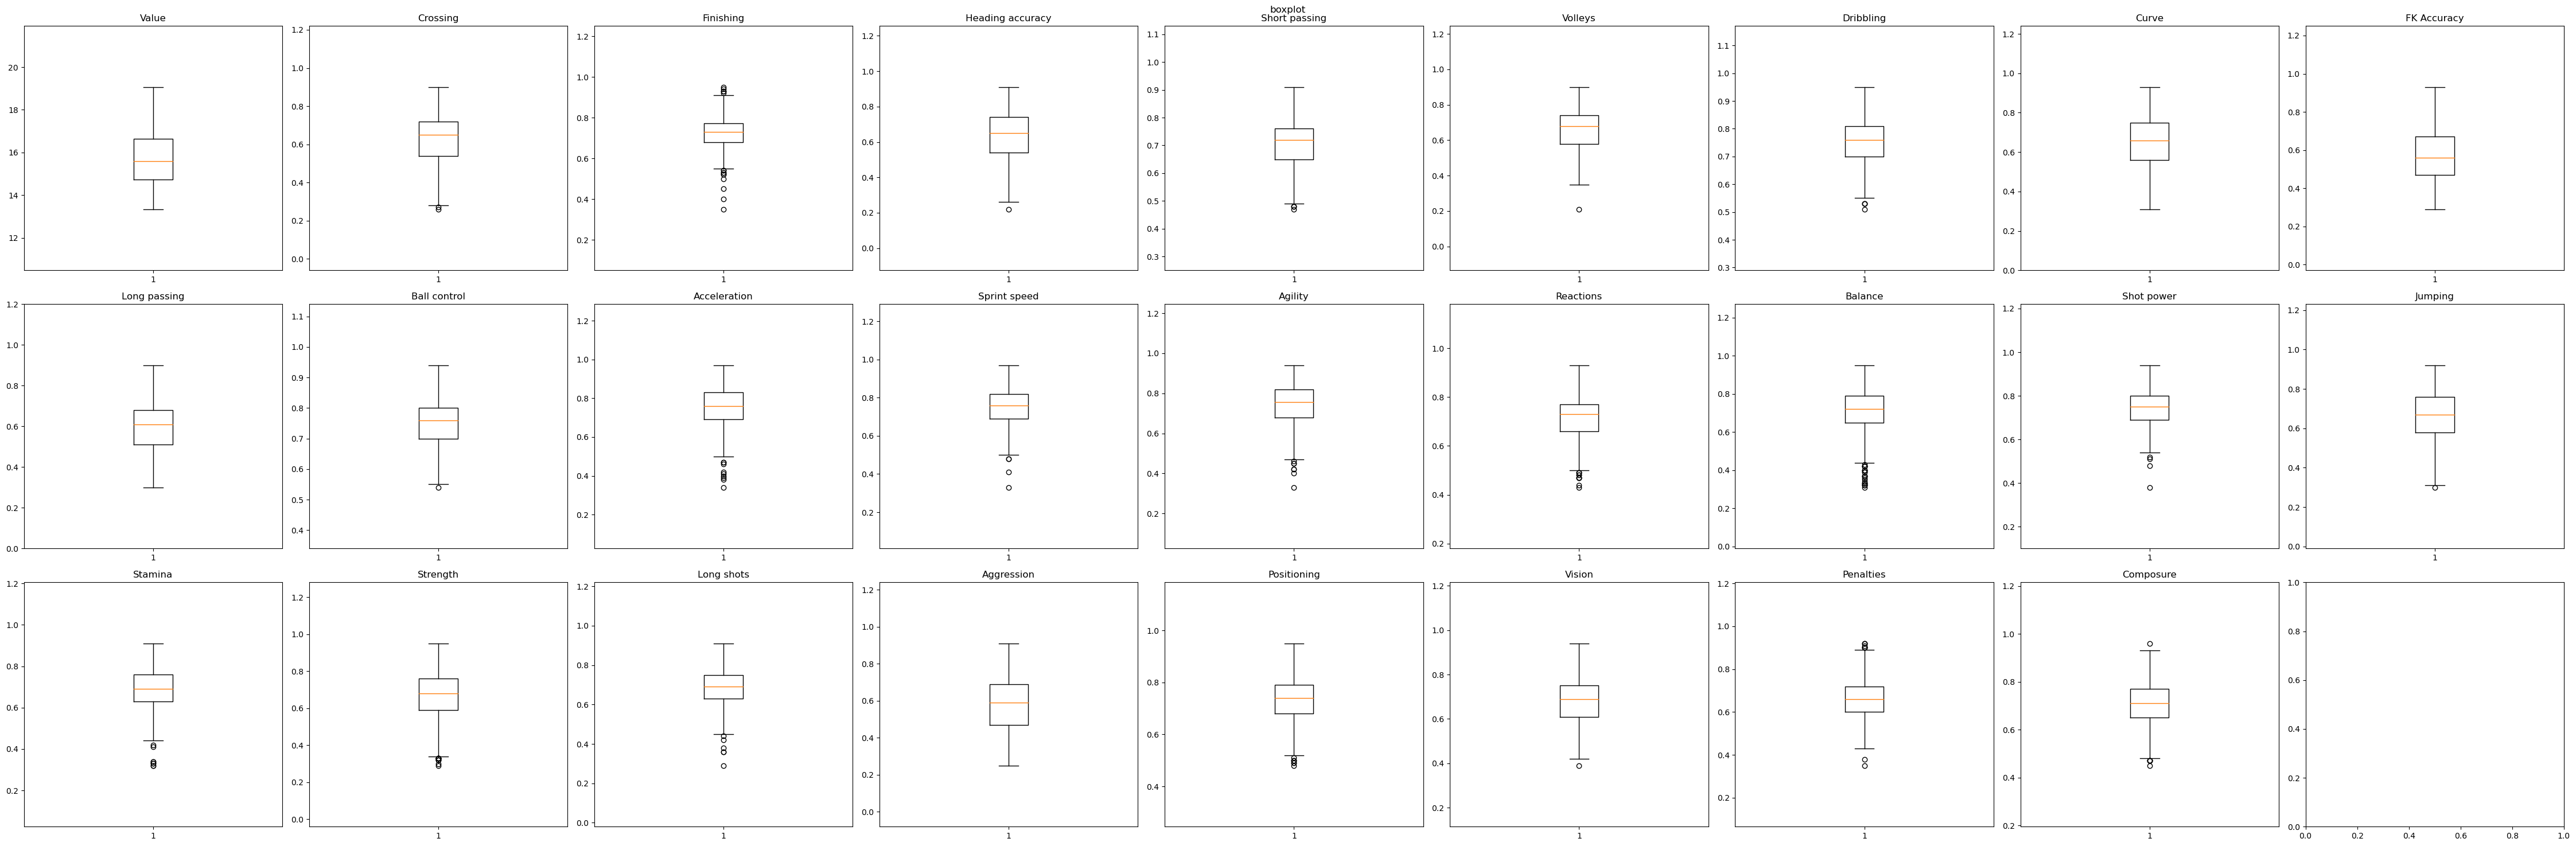

In [14]:
plot_boxplot(numeric_columns, "boxplot", 9)

In [15]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 11.85641737156534
Higher fence is = 19.52410782029358
Applied to 0 row(s) of Value column
Lower fence is = 0.27000000000000013
Higher fence is = 0.9899999999999999
Applied to 2 row(s) of Crossing column
Lower fence is = 0.5412500000000002
Higher fence is = 0.9112499999999999
Applied to 15 row(s) of Finishing column
Lower fence is = 0.2400000000000001
Higher fence is = 1.04
Applied to 1 row(s) of Heading accuracy column
Lower fence is = 0.48500000000000004
Higher fence is = 0.925
Applied to 4 row(s) of Short passing column
Lower fence is = 0.3399999999999999
Higher fence is = 0.98
Applied to 1 row(s) of Volleys column
Lower fence is = 0.5349999999999998
Higher fence is = 0.9750000000000002
Applied to 4 row(s) of Dribbling column
Lower fence is = 0.27500000000000013
Higher fence is = 1.035
Applied to 0 row(s) of Curve column
Lower fence is = 0.16999999999999987
Higher fence is = 0.9700000000000002
Applied to 0 row(s) of FK Accuracy column
Lower fence is = 0.2549999999999

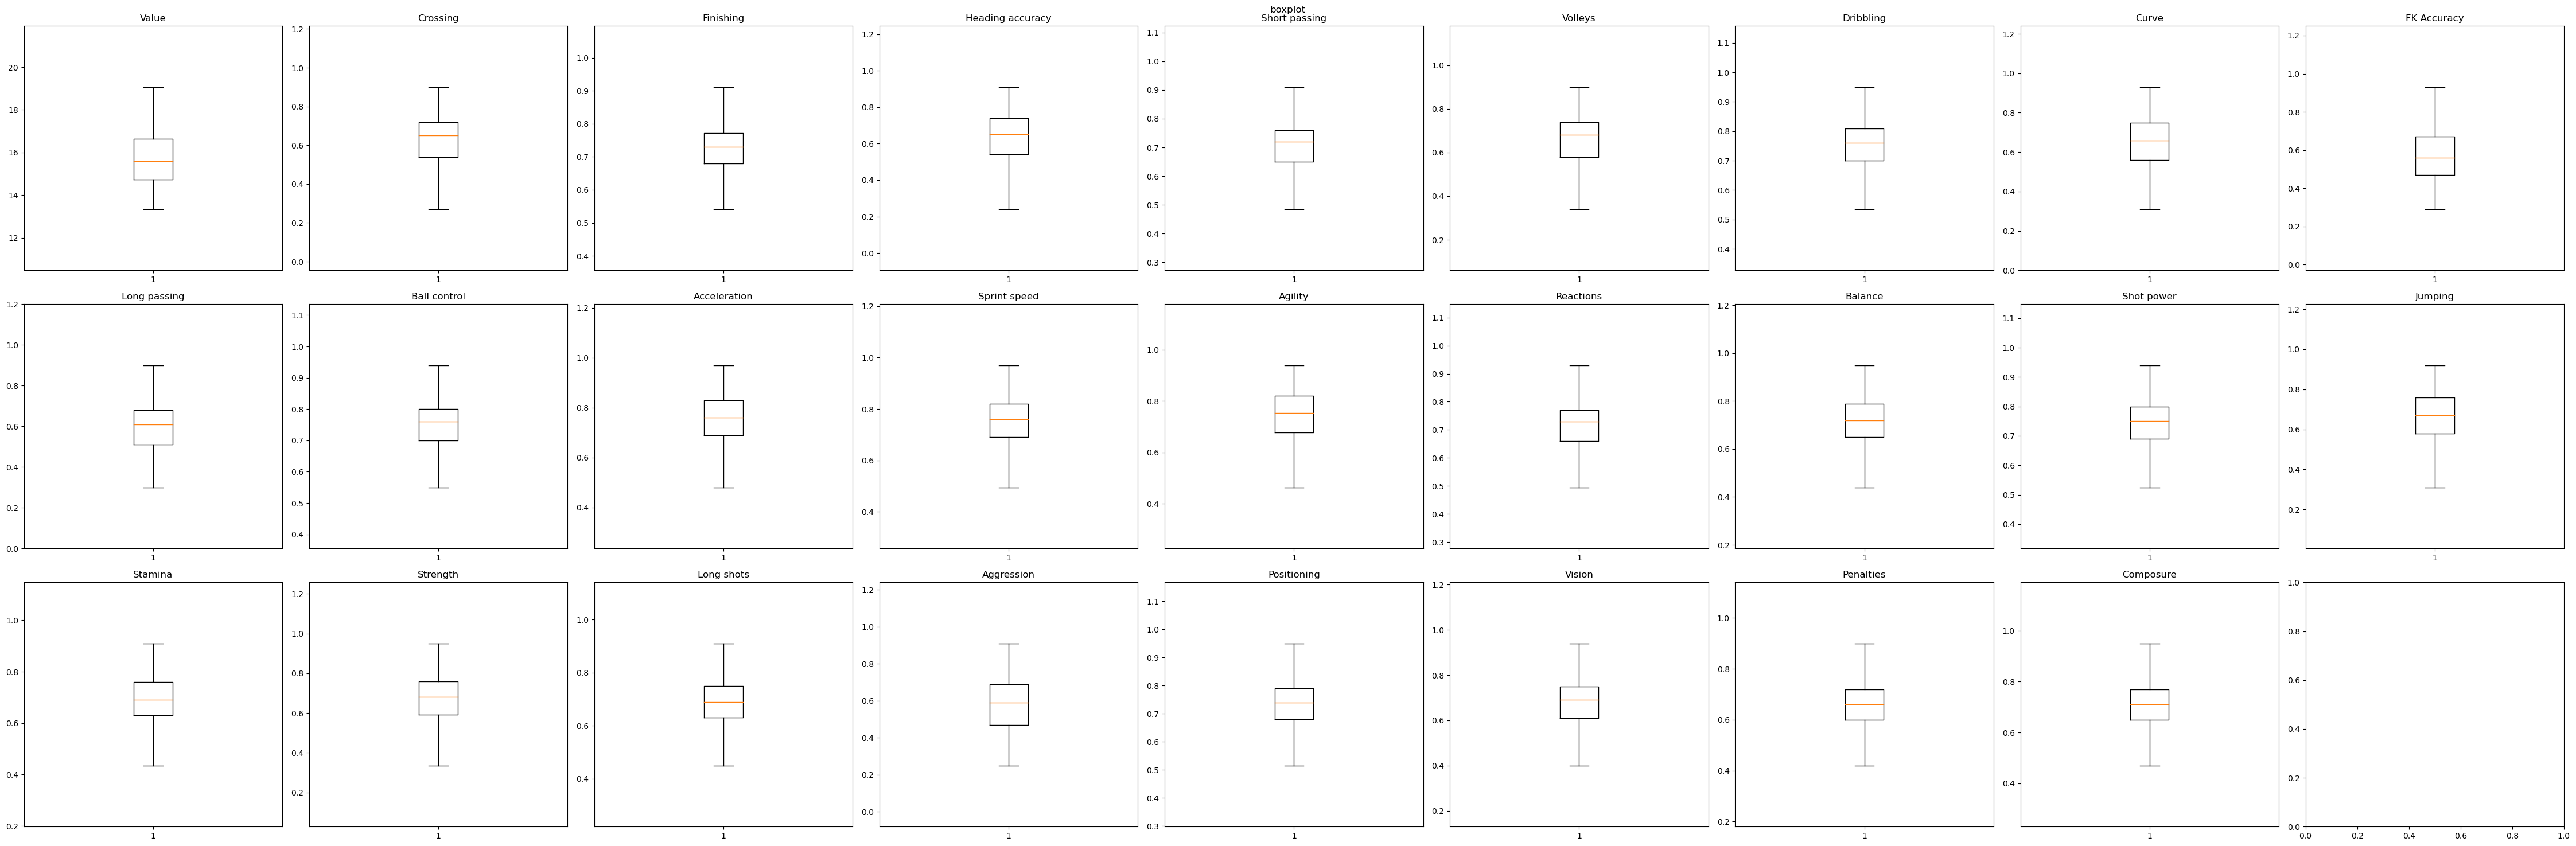

In [16]:
plot_boxplot(numeric_columns, "boxplot", 9)

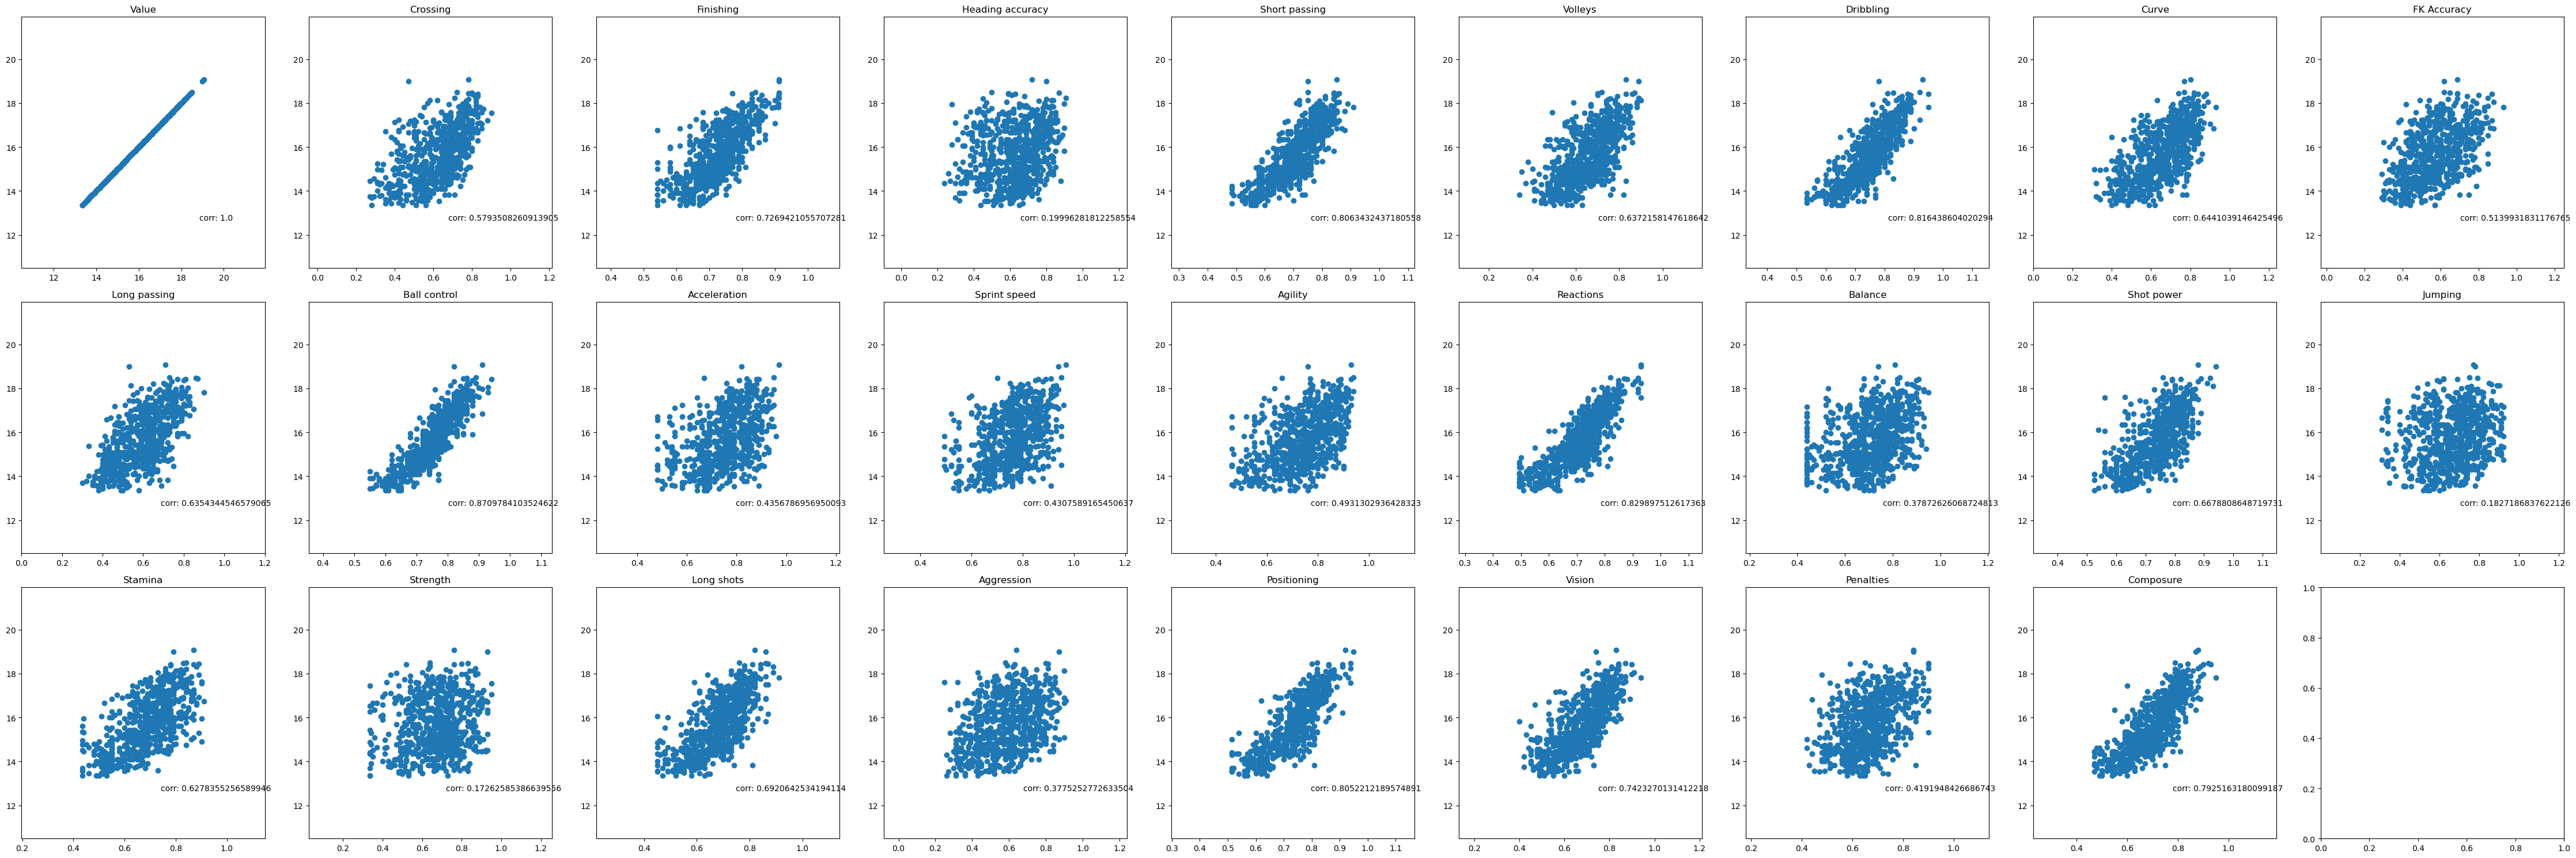

In [17]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=9)

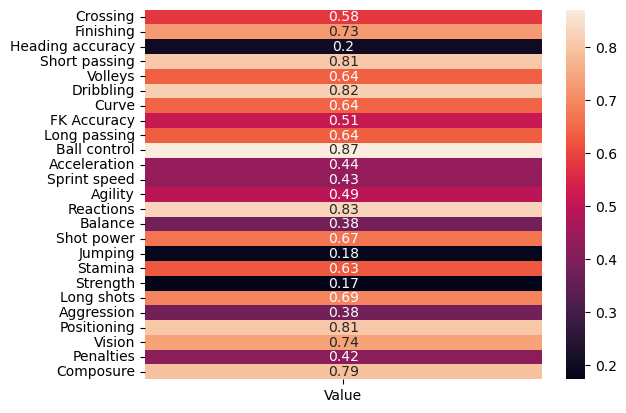

In [18]:
# tính corelation
# 1 là phụ thuộc tuyến tính dương
# 0 là ko phụ thuộc tt
# -1 là phụ thuộc tt âm
correlations = df.corr().drop('Value', axis=0)['Value']
correlations = pd.DataFrame(correlations)
sns.heatmap( correlations, annot=True, yticklabels=True)
plt.show()

In [19]:
# Tính Q3 của tất cả các tương quan với 'value'
q3_corr_value = correlations['Value'].quantile(0.75)

attrWithHighCorr = []
for index, value in correlations['Value'].items():
    if value > q3_corr_value:
        attrWithHighCorr.append(index)

# Hiển thị các thuộc tính được chọn
print("Attributes with high correlation value:", attrWithHighCorr)

Attributes with high correlation value: ['Short passing', 'Dribbling', 'Ball control', 'Reactions', 'Positioning', 'Composure']


In [20]:
# các thuộc tính có correlation với Value cao sẽ được bình phương để dự đoán nhạy hơn với các thuộc tính này
for attr in attrWithHighCorr:
    df[attr] = (df[attr]**2) * 100
df

,Value,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Positioning,Vision,Penalties,Composure
0,19.065163,0.78,0.91125,0.72,72.2500,0.83,86.49,0.80,0.69,0.71,82.81,0.97,0.97,0.93,86.49,0.81,0.880,0.77,0.870,0.760,0.82,0.64,84.64,0.83,0.84,77.44
1,18.988831,0.47,0.91125,0.80,56.2500,0.89,60.84,0.77,0.62,0.53,67.24,0.82,0.94,0.76,86.49,0.74,0.940,0.78,0.790,0.930,0.86,0.87,90.25,0.74,0.84,75.69
2,18.506858,0.72,0.84000,0.50,56.2500,0.72,84.64,0.77,0.62,0.73,79.21,0.95,0.95,0.94,67.24,0.83,0.760,0.75,0.840,0.640,0.76,0.58,67.24,0.75,0.65,62.41
3,18.474222,0.80,0.91125,0.87,70.5600,0.87,68.89,0.82,0.65,0.86,73.96,0.67,0.70,0.66,84.64,0.73,0.920,0.79,0.830,0.830,0.86,0.80,88.36,0.87,0.90,84.64
4,18.440483,0.78,0.77000,0.59,73.9600,0.70,65.61,0.74,0.69,0.87,72.25,0.84,0.91,0.77,75.69,0.68,0.890,0.62,0.890,0.800,0.87,0.81,64.00,0.84,0.59,70.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,13.422468,0.35,0.67000,0.60,23.5225,0.46,39.69,0.48,0.39,0.40,30.25,0.73,0.65,0.65,29.16,0.72,0.640,0.57,0.520,0.500,0.64,0.31,29.16,0.49,0.74,25.00
716,13.345507,0.44,0.67000,0.65,31.3600,0.58,40.96,0.48,0.39,0.38,36.00,0.68,0.55,0.71,39.69,0.72,0.620,0.54,0.530,0.335,0.52,0.26,31.36,0.49,0.63,24.01
717,13.345507,0.56,0.54125,0.44,36.0000,0.56,42.25,0.59,0.57,0.58,42.25,0.64,0.67,0.76,30.25,0.70,0.600,0.55,0.500,0.335,0.47,0.43,32.49,0.60,0.58,36.00
718,13.345507,0.51,0.61000,0.51,32.4900,0.63,43.56,0.62,0.57,0.49,40.96,0.68,0.67,0.69,26.01,0.68,0.710,0.52,0.490,0.530,0.63,0.36,31.36,0.51,0.65,29.16


In [21]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

# tỉ lệ 20% là dữ liệu để test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
    # chia tập train thành 5 tập nhỏ và tạo ra 5 model được train trên từng tập nhỏ
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  # test 5 model trên tập test
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  # lấy trung bình
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  # gần 1 là tốt
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.3158335146575634
RMSE:  0.39352700442716576
r2 score:  0.896144536852393

decision_tree
MAE:  0.3535979343168027
RMSE:  0.45024822439288836
r2 score:  0.8640484119048656

random_forest
MAE:  0.33543378316180983
RMSE:  0.4167923091326316
r2 score:  0.883501680528116



In [23]:
from sklearn.model_selection import GridSearchCV

# thử hằng số phạt
param_grid = {
    'ridge_regression': {'alpha': np.arange(0.1, 0.2, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  # tìm alpha cho mô hình tốt nhất bằng cách thử các alpha với phương pháp cross-validate
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  # chọn alpha tốt nhất
  reg_linear_models[model_name] = grid_search.best_estimator_
  # huấn luyện lại trên toàn bộ tập train để tìm ra tham số của hàm tuyến tính
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.16999999999999998)
MAE:  0.3178191244773991
RMSE:  0.39597593180779617
r2 score:  0.8948479251887895

Lasso(alpha=0.0007000000000000001)
MAE:  0.3172879487382597
RMSE:  0.3956042032959987
r2 score:  0.8950452587835909



In [24]:
models['linear_regression'].fit(X_train, y_train)
y_pred = models['linear_regression'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,15.761421,15.714084
1,16.012735,16.025017
2,17.541204,17.186528
3,16.588099,16.287171
4,15.096444,15.473283
...,...,...
139,16.733281,16.533766
140,16.733281,17.219740
141,16.588099,16.419071
142,16.929026,16.502838


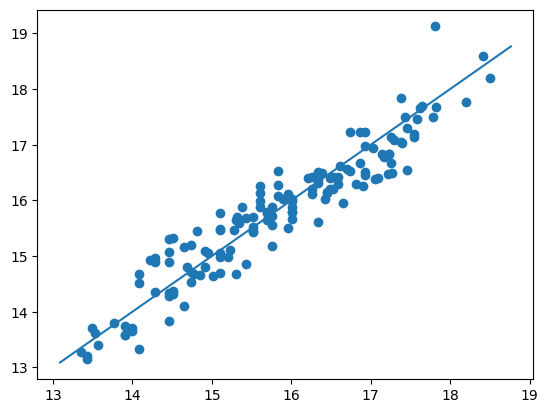

In [25]:
# các điểm nằm dưới đường chéo cho thấy y_test > y_pred và ngược lại
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())

In [26]:
percent_loss = np.sum(abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 1./len(y_test)
percent_loss

0.3297769671335506

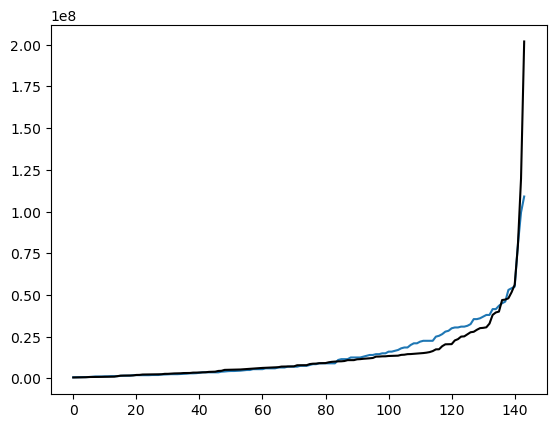

In [28]:
y_test = list(y_test)
y_test.sort()
y_pred.sort()
plt.plot(range(len(y_test)), np.exp(y_test))
plt.plot(range(len(y_test)), np.exp(y_pred), color='#000000')